# Aula 2 - KNN

Nessa aula, iremos tratar dos seguintes conteúdos:
- KNN - Classificador;
- KNN - Regressão.

<img src="https://www.researchgate.net/profile/Mohammed-Badawy/publication/331424423/figure/fig1/AS:732056359297024@1551547245072/Example-on-KNN-classifier.png" width=600>

###  

## K Nearest Neighbors ou K-Vizinhos

O modelo K Nearest NEighbors ou K-Vizinhos (KNN) é um modelo de classificação bem simples, onde a ideia de aplicação do modelo é: iremos definir se um dado pertence ou não a uma classe, ou no caso multi classes para qual das classes irá pertencer, a partir de cálculos de **distâncias!** <br><br>

A cada observação nova que devemos classificar, será feito o cálculo de distância das $K$ observações mais próximas em relação ao elemento a ser classificado e de acordo com a classificação desses vizinhos próximos, será definida a classe da observação: 

<img src="https://res.cloudinary.com/dyd911kmh/image/upload/f_auto,q_auto:best/v1531424125/KNN_final1_ibdm8a.png" width=600>

É importante ressaltar que o modelo KNN é **bem simples** de rodar, tem um **custo computacional mais baixo** em relação a outros modelos, mas esse modelo **ele não aprende** com os dados já observados, toda vez que tivermos novos dados serão calculadas todas as ditâncias para definir os elementos mais próximos e assim conseguir classificá-lo.<br><br>

Existem vários tipos de distâncias diferentes que podemos utilizar no KNN, sendo elas: [Euclidiana](https://en.wikipedia.org/wiki/Euclidean_distance), [Minkowski](https://en.wikipedia.org/wiki/Minkowski_distance), [Cosseno](https://cmry.github.io/notes/euclidean-v-cosine) e [Pearson](https://en.wikipedia.org/wiki/Pearson_correlation_coefficient).<br><br>

Então basicamente o nosso processo de modelagem envolve as seguintes etapas:

1. Recebe um dado não classificado;
2. Mede sua distância (Euclidiana, Manhattan, Minkowski ou Ponderada) de cada um dos elementos da base de treino;
3. Obtém um *ranking* das distâncias, emordem decrescente;
4. Verifica a classe de cada da um dos *K* dados que tiveram a menor distância e conta a quantidade de cada classe;
5. Toma como resultado a classe que mais apareceu dentre os dados que tiveram as menores distâncias;
6. Classifica o novo dado com a classe tomada como resultado da classificação.

Mas sempre que olhamos para o nosso processo de modelagem (como o exemplo acima), a primeira dúvida que vem na cabeça é:

> Qual é o número de vizinhos adequados: i.e., **como escolher $k$?**

Essa é uma escolha particularmente importante, pois escolhas diferentes de $k$ podem facilmente levar a classificações diferentes:

<img src="https://helloacm.com/wp-content/uploads/2016/03/2012-10-26-knn-concept.png" width=400>

In [ ]:
from mlxtend.plotting import plot_decision_regions
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.neighbors import KNeighborsClassifier
import sklearn.datasets as skdata
from matplotlib import pyplot
from pandas import DataFrame

# Gera os dados em duas dimensões
n_samples = 1000 # número de observações
# centro dos grupos
centers = [(-2, 2), (0, 2), (0, -1)]
X, y = skdata.make_blobs(n_samples=300, n_features=2, cluster_std=1.0, centers=centers, 
                         shuffle=False, random_state=42)

# monta a matrix de atributos
d = np.column_stack((X,np.transpose(y)))
# converte para o formato dataframe do Pandas
data = DataFrame(data = d, columns=['X1', 'X2', 'y'])
features_names = ['X1', 'X2']
class_labels = np.unique(y)

# mostra os dados e colori de acordo com as classes
colors = ['red', 'blue', 'green']
aux = 0
plt.figure(figsize=(10,6))
for c in class_labels:
    ind = np.where(y == c)
    plt.scatter(X[ind,0][0], X[ind,1][0], color = colors[aux], label = c)
    aux = aux + 1
plt.xlabel('X1', fontsize=15)
plt.ylabel('X2', fontsize=15)
plt.title('Distribuição dos Dados com Label', fontsize=15)
plt.legend()
plt.show()

# mostra as regiões de separação para diversos valores de k
vk = [1, 4, 8, 12]
for k in vk:
    # Training a classifier
    model = KNeighborsClassifier(n_neighbors=k, metric = 'euclidean')
    model.fit(X, y)
    # Plotting decision regions
    plt.figure(figsize=(10,6))
    plot_decision_regions(X, y, clf=model, legend=2)
    plt.xlabel('X1', fontsize=15)
    plt.ylabel('X2', fontsize=15)
    plt.title('Distribuição com Separação: k = '+str(k), fontsize=15)
    plt.legend()
    plt.show()

##   

## Exemplo Prático

In [4]:
# importe as principais bibliotecas

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

#### Lendo conjunto de dados

Como exemplo, vamos utilizar dados de Câncer de Mama, esses dados estão disponiveis também no [UCI](https://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Wisconsin+(Diagnostic)) ou pelo site do [Kaggle](https://www.kaggle.com/uciml/breast-cancer-wisconsin-data). 

A ideia é que consigamos construir um modelo classificador entre câncer maligno e benigno.

In [3]:
# leia a base de "../datasets/breast_cancer.csv"

df = pd.read_csv("../datasets/breast_cancer.csv")

In [4]:
# dê uma olhada no info, describe, etc

df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [5]:
df.shape

(569, 32)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [7]:
# drope a coluna de id

df = df.drop(columns="id")

In [9]:
df.describe()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


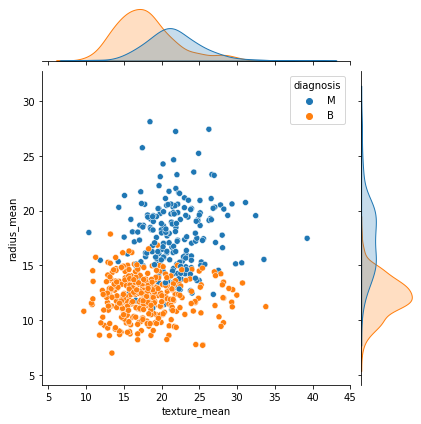

In [10]:
# visualize a relação entre as colnas x='texture_mean' e y='radius_mean'
# sempre adicione o hue!!

sns.jointplot(data=df, x='texture_mean', y='radius_mean', hue='diagnosis')

Uma pergunta é muitíssimo importante:

In [11]:
# os dados são balanceados com relação ao target?

df["diagnosis"].value_counts(normalize=True)

B    0.627417
M    0.372583
Name: diagnosis, dtype: float64

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='diagnosis', ylabel='count'>

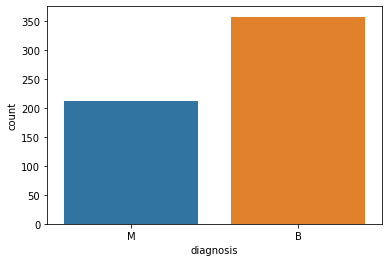

In [12]:
sns.countplot(df["diagnosis"])

No caso temos dados desbalanceados mas não é algo muito agravante onde temos uma única classe muitp redominante (>80-90% dos dados). Então continuaremos a usar os dados sem grandes tratamentos, mas no percorrer do curso aprenderemos algumas técnicas para lidar com dados desbalanceados.

In [13]:
X = df.drop(columns="diagnosis")
y = df["diagnosis"]

In [14]:
# 3) Separe os dados em dados de treino e dados de teste
# use o train-test split com atenção ao parâmetro stratify!!

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y, 
                                                    test_size=0.2, 
                                                    random_state=42,
                                                    stratify=y)

Usando o *stratify* no *train_test_split* é uma das formas de lidarmos com dados desbalanceados. O objetivo de passarmos esse parâmetros é que na separação das bases, que seja mantido a proporcionalidade entre as classes:

In [15]:
y.value_counts(normalize=True)

B    0.627417
M    0.372583
Name: diagnosis, dtype: float64

In [16]:
y_train.value_counts(normalize=True)

B    0.626374
M    0.373626
Name: diagnosis, dtype: float64

In [17]:
y_test.value_counts(normalize=True)

B    0.631579
M    0.368421
Name: diagnosis, dtype: float64

#### Transformaç!ao dos Dados

Em alguns modelos de classificação, principalmente em modelos baseado em distâncias, é sempre importante transformarmos nossos dados para escalas parecidas. Isso é necessário pois dependendo da ordem de grandeza de cada um das variáveis isso pode influenciar nos cálculos do nosso modelo. As transformaç˜eos mais comuns são [StandardScaler](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html?highlight=standardscaler#sklearn.preprocessing.StandardScaler) e [MinMaxScaler](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MinMaxScaler.html?highlight=minmaxscaler#sklearn.preprocessing.MinMaxScaler). Vamos utilizar o _StandardScaler_ a seguir:

In [18]:
from sklearn.preprocessing import StandardScaler 

In [19]:
scaler = StandardScaler()

In [20]:
X_train_std = scaler.fit_transform(X_train)

In [21]:
X_train

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
10,16.02,23.24,102.70,797.8,0.08206,0.06669,0.03299,0.03323,0.1528,0.05697,...,19.19,33.88,123.80,1150.0,0.11810,0.15510,0.14590,0.09975,0.2948,0.08452
170,12.32,12.39,78.85,464.1,0.10280,0.06981,0.03987,0.03700,0.1959,0.05955,...,13.50,15.64,86.97,549.1,0.13850,0.12660,0.12420,0.09391,0.2827,0.06771
407,12.85,21.37,82.63,514.5,0.07551,0.08316,0.06126,0.01867,0.1580,0.06114,...,14.40,27.01,91.63,645.8,0.09402,0.19360,0.18380,0.05601,0.2488,0.08151
430,14.90,22.53,102.10,685.0,0.09947,0.22250,0.27330,0.09711,0.2041,0.06898,...,16.35,27.57,125.40,832.7,0.14190,0.70900,0.90190,0.24750,0.2866,0.11550
27,18.61,20.25,122.10,1094.0,0.09440,0.10660,0.14900,0.07731,0.1697,0.05699,...,21.31,27.26,139.90,1403.0,0.13380,0.21170,0.34460,0.14900,0.2341,0.07421
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37,13.03,18.42,82.61,523.8,0.08983,0.03766,0.02562,0.02923,0.1467,0.05863,...,13.30,22.81,84.46,545.9,0.09701,0.04619,0.04833,0.05013,0.1987,0.06169
415,11.89,21.17,76.39,433.8,0.09773,0.08120,0.02555,0.02179,0.2019,0.06290,...,13.05,27.21,85.09,522.9,0.14260,0.21870,0.11640,0.08263,0.3075,0.07351
458,13.00,25.13,82.61,520.2,0.08369,0.05073,0.01206,0.01762,0.1667,0.05449,...,14.34,31.88,91.06,628.5,0.12180,0.10930,0.04462,0.05921,0.2306,0.06291
476,14.20,20.53,92.41,618.4,0.08931,0.11080,0.05063,0.03058,0.1506,0.06009,...,16.45,27.26,112.10,828.5,0.11530,0.34290,0.25120,0.13390,0.2534,0.07858


In [22]:
X_train_std

array([[ 0.51855873,  0.89182579,  0.4246317 , ..., -0.23574392,
         0.05456632,  0.02183673],
       [-0.51636409, -1.63971029, -0.54134872, ..., -0.32320788,
        -0.13757624, -0.90440164],
       [-0.36811839,  0.45551496, -0.38824993, ..., -0.89082504,
        -0.675893  , -0.14401559],
       ...,
       [-0.32616206,  1.33280304, -0.38905998, ..., -0.84289958,
        -0.96490082, -1.16888375],
       [ 0.00948859,  0.25952507,  0.00786279, ...,  0.27571059,
        -0.60284707, -0.30545988],
       [ 0.80945595,  0.36918608,  0.79320285, ...,  1.00657384,
        -0.46151907, -0.44817001]])

In [23]:
X_test_std = scaler.transform(X_test)

In [24]:
X_test

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
120,11.41,10.82,73.34,403.3,0.09373,0.06685,0.03512,0.02623,0.1667,0.06113,...,12.82,15.97,83.74,510.5,0.1548,0.2390,0.21020,0.08958,0.3016,0.08523
250,20.94,23.56,138.90,1364.0,0.10070,0.16060,0.27120,0.13100,0.2205,0.05898,...,25.58,27.00,165.30,2010.0,0.1211,0.3172,0.69910,0.21050,0.3126,0.07849
375,16.17,16.07,106.30,788.5,0.09880,0.14380,0.06651,0.05397,0.1990,0.06572,...,16.97,19.14,113.10,861.5,0.1235,0.2550,0.21140,0.12510,0.3153,0.08960
99,14.42,19.77,94.48,642.5,0.09752,0.11410,0.09388,0.05839,0.1879,0.06390,...,16.33,30.86,109.50,826.4,0.1431,0.3026,0.31940,0.15650,0.2718,0.09353
455,13.38,30.72,86.34,557.2,0.09245,0.07426,0.02819,0.03264,0.1375,0.06016,...,15.05,41.61,96.69,705.6,0.1172,0.1421,0.07003,0.07763,0.2196,0.07675
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
381,11.04,14.93,70.67,372.7,0.07987,0.07079,0.03546,0.02074,0.2003,0.06246,...,12.09,20.83,79.73,447.1,0.1095,0.1982,0.15530,0.06754,0.3202,0.07287
534,10.96,17.62,70.79,365.6,0.09687,0.09752,0.05263,0.02788,0.1619,0.06408,...,11.62,26.51,76.43,407.5,0.1428,0.2510,0.21230,0.09861,0.2289,0.08278
448,14.53,19.34,94.25,659.7,0.08388,0.07800,0.08817,0.02925,0.1473,0.05746,...,16.30,28.39,108.10,830.5,0.1089,0.2649,0.37790,0.09594,0.2471,0.07463
205,15.12,16.68,98.78,716.6,0.08876,0.09588,0.07550,0.04079,0.1594,0.05986,...,17.77,20.24,117.70,989.5,0.1491,0.3331,0.33270,0.12520,0.3415,0.09740


In [25]:
X_test_std

array([[-0.77089916, -2.00602473, -0.76451652, ..., -0.38805702,
         0.16254727,  0.06095804],
       [ 1.89472636,  0.96648861,  1.89081582, ...,  1.42292627,
         0.33722232, -0.31041892],
       [ 0.56051506, -0.78108791,  0.57044007, ...,  0.14391558,
         0.38009711,  0.30174696],
       ...,
       [ 0.10179251, -0.01812727,  0.08238707, ..., -0.29280517,
        -0.70288824, -0.52310661],
       [ 0.26682074, -0.63876192,  0.26586259, ...,  0.14541325,
         0.79614133,  0.73153038],
       [ 0.53254417,  0.05420233,  0.48133495, ...,  0.54678897,
        -0.41864428, -1.11598733]])

Agora vamos para o nosso processo padrão de instância, fit e predict para o modelo:<br>
Deixarei o link do Scikit-Learn para [KNeighborsClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html).

In [26]:
from sklearn.neighbors import KNeighborsClassifier

In [27]:
# Faça a chamada do modelo
model = KNeighborsClassifier(n_neighbors=5)

In [28]:
# Fit do modelo 
model.fit(X_train_std, y_train)

KNeighborsClassifier()

In [29]:
# Predict do modelo
y_pred = model.predict(X_test_std)
y_pred

array(['B', 'M', 'B', 'B', 'B', 'B', 'M', 'B', 'B', 'B', 'M', 'B', 'M',
       'B', 'B', 'B', 'B', 'B', 'M', 'B', 'B', 'B', 'M', 'M', 'M', 'B',
       'B', 'M', 'M', 'M', 'M', 'B', 'M', 'M', 'B', 'B', 'B', 'B', 'M',
       'B', 'B', 'B', 'B', 'B', 'B', 'M', 'B', 'M', 'B', 'B', 'M', 'M',
       'B', 'B', 'B', 'M', 'B', 'B', 'B', 'M', 'B', 'B', 'M', 'B', 'B',
       'B', 'M', 'M', 'B', 'M', 'B', 'M', 'M', 'B', 'B', 'B', 'B', 'M',
       'B', 'M', 'M', 'M', 'B', 'B', 'B', 'B', 'M', 'M', 'M', 'B', 'M',
       'B', 'B', 'B', 'B', 'B', 'B', 'M', 'B', 'B', 'B', 'B', 'B', 'B',
       'B', 'B', 'M', 'B', 'M', 'B', 'B', 'B', 'B', 'M'], dtype=object)

In [30]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           B       0.95      0.99      0.97        72
           M       0.97      0.90      0.94        42

    accuracy                           0.96       114
   macro avg       0.96      0.95      0.95       114
weighted avg       0.96      0.96      0.96       114



garantir a consistencia dos dados pela matrix de confusão
nos casos errou 4 dos casos 

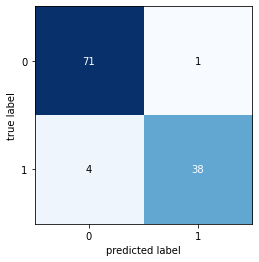

In [31]:
from mlxtend.plotting import plot_confusion_matrix
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)

plot_confusion_matrix(conf_mat=cm)
plt.show()

### Definindo o valor de K vizinhos

Vamos criar um looping e fazer uma varredura nos valor de K, para encontramos o valor ideal para o K:

In [32]:
def plot_complexity_curve(k_list, knn_model, x_train, x_test, y_train, y_test):
    
    train_scores = []
    test_scores = []
    
    # For each k
    for k in k_list:
        # Initialize, fit, predict
        knn = knn_model(k)
        
        knn.fit(x_train, y_train)
        
        train_scores.append(knn.score(x_train, y_train))
        test_scores.append(knn.score(x_test, y_test))

    # Plot
    fig, ax = plt.subplots(figsize = [12,8])
    
    ax.plot(k_list, train_scores, label='Training Accuracy', color='blue')
    ax.plot(k_list, test_scores, label='Testing Accuracy', color='red')

    ax.set(title='k-NN with Different Values for $k$',
           xlabel='Number of Neighbors',
           ylabel='Accuracy')
    
    ax.legend()

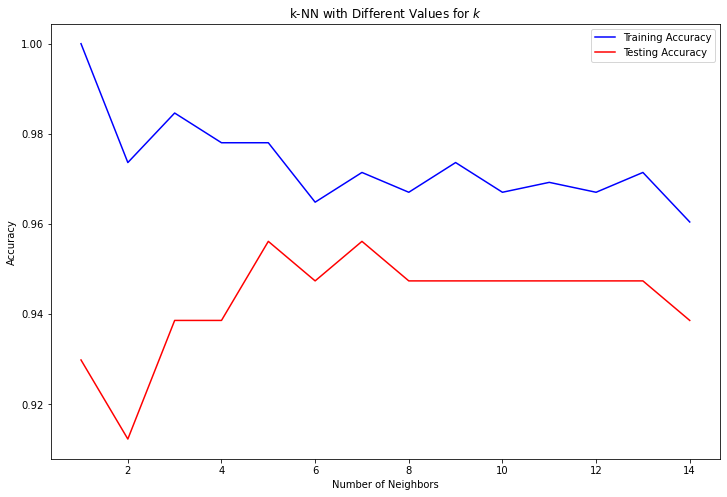

In [33]:
# Create possible values for k
neighbors = np.arange(1, 15)

plot_complexity_curve(neighbors, KNeighborsClassifier, X_train_std, X_test_std, y_train, y_test)

## 

## KNN como Regressão

Podemos aplicar da mesma forma que em Árvores de Regressão, para o modelo de __KNN__, temos uma versão com __Regressão__:

In [34]:
from sklearn.neighbors import KNeighborsRegressor

In [35]:
penguins = sns.load_dataset('penguins')

In [36]:
penguins.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   bill_length_mm     342 non-null    float64
 3   bill_depth_mm      342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                333 non-null    object 
dtypes: float64(4), object(3)
memory usage: 18.9+ KB


In [37]:
penguins.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female


In [38]:
penguins.shape

(344, 7)

In [39]:
penguins.dropna(inplace = True)

In [40]:
penguins.shape

(333, 7)

In [41]:
penguins['sex'] = np.where(penguins['sex'] == 'Female', 1, 0)

In [42]:
penguins.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,0
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,1
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,1
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,1
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,0


In [43]:
penguins['species'].value_counts()

Adelie       146
Gentoo       119
Chinstrap     68
Name: species, dtype: int64

In [44]:
penguins['island'].value_counts()

Biscoe       163
Dream        123
Torgersen     47
Name: island, dtype: int64

In [58]:
#penguins_with_dummies = pd.get_dummies(penguins, columns = ['species', 'island'], drop_first = True)
penguins_with_dummies = pd.get_dummies(penguins, columns = ['species', 'island'])

In [59]:
penguins_with_dummies.head()

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,species_Adelie,species_Chinstrap,species_Gentoo,island_Biscoe,island_Dream,island_Torgersen
0,39.1,18.7,181.0,3750.0,0,1,0,0,0,0,1
1,39.5,17.4,186.0,3800.0,1,1,0,0,0,0,1
2,40.3,18.0,195.0,3250.0,1,1,0,0,0,0,1
4,36.7,19.3,193.0,3450.0,1,1,0,0,0,0,1
5,39.3,20.6,190.0,3650.0,0,1,0,0,0,0,1


In [60]:
X = penguins_with_dummies.drop('body_mass_g', axis = 1)
y = penguins_with_dummies['body_mass_g']

In [61]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y, 
                                                    test_size=0.2, 
                                                    random_state=42)

In [62]:
from sklearn.preprocessing import StandardScaler

In [63]:
std = StandardScaler()

In [64]:
X_train_std = std.fit_transform(X_train)
X_test_std = std.transform(X_test)

In [65]:
model = KNeighborsRegressor()

In [66]:
model.fit(X_train_std, y_train)

KNeighborsRegressor()

In [67]:
y_pred = model.predict(X_test_std)

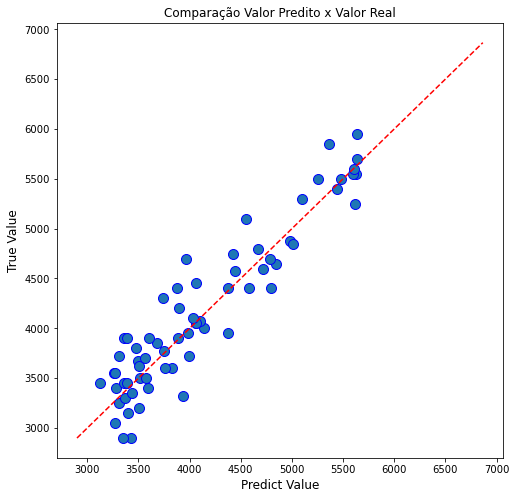

In [68]:
# Vamos criar um gráfico para comparar os Valores Reais com os Preditos
fig = plt.figure(figsize=(8,8))
l = plt.plot(y_pred, y_test, 'bo')
plt.setp(l, markersize=10)
plt.setp(l, markerfacecolor='C0')
plt.title('Comparação Valor Predito x Valor Real', fontsize=12)
plt.ylabel("True Value", fontsize=12)
plt.xlabel("Predict Value", fontsize=12)

# mostra os valores preditos e originais
xl = np.arange(min(y_test), 1.2*max(y_test),(max(y_test)-min(y_test))/10)
yl = xl
plt.plot(xl, yl, 'r--')

plt.show()

In [69]:
from sklearn.metrics import r2_score
R2 = r2_score(y_test, y_pred)
print('R2:', R2)

R2: 0.8699998364457993


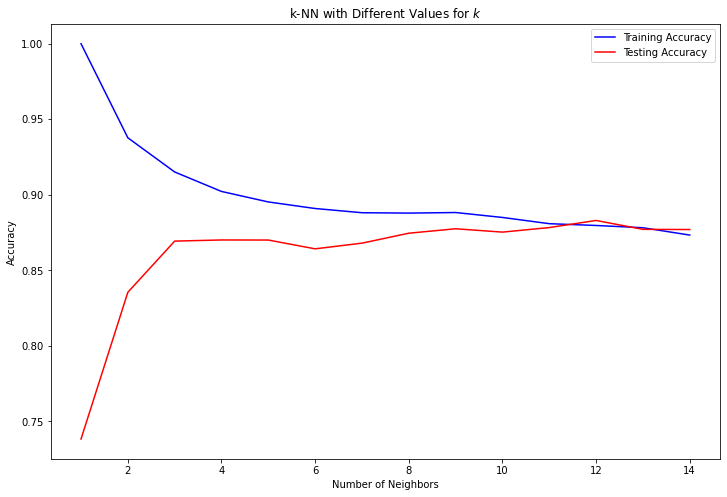

In [70]:
# escolhe o melhor K
neighbors = np.arange(1, 15)

plot_complexity_curve(neighbors, KNeighborsRegressor, X_train_std, X_test_std, y_train, y_test)

## 

## Exercícios

Utilizando a base de dados do `insurance.csv`, resolva os seguintes exercícios:

- __1)__ Utilize um KNN classificador para definir as classes de _charges_ de acordo com as variáveis. Será preciso construir a target para esse exercício, então utilize o _jointplot_ entre a idade e o _charges_ para definir 3 regiões de separação;

- __2)__ Agora utilize um KNN regressor para definir os valores de _charges_.

In [16]:
df = pd.read_csv("../datasets/insurance.csv")

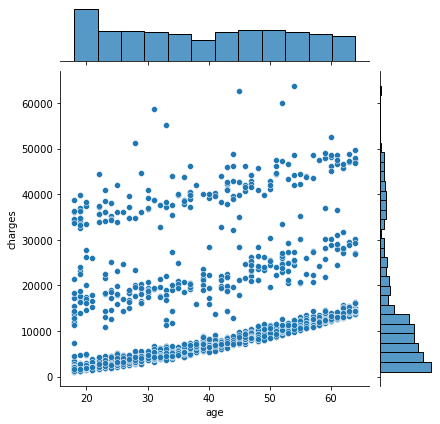

In [17]:
sns.jointplot(data=df, x="age", y="charges")
plt.show()

In [18]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [19]:
df['target'] = np.where(df['charges'] < 10_000, 0, np.where(df['charges'] < 30_000, 1, 2))

In [20]:
df['target'].value_counts(normalize = True)

0    0.532138
1    0.346786
2    0.121076
Name: target, dtype: float64

In [21]:
df.head()

,age,sex,bmi,children,smoker,region,charges,target
0,19,female,27.900,0,yes,southwest,16884.92400,1
1,18,male,33.770,1,no,southeast,1725.55230,0
2,28,male,33.000,3,no,southeast,4449.46200,0
3,33,male,22.705,0,no,northwest,21984.47061,1
4,32,male,28.880,0,no,northwest,3866.85520,0


In [22]:
df['flag_sex'] = np.where(df['sex'] == 'female', 1, 0)

In [23]:
df['is_female'] = np.where(df['sex'] == 'female', 1, 0)

In [24]:
df['is_smoker'] = np.where(df['smoker'] == 'yes', 1, 0)

In [25]:
df.head()

,age,sex,bmi,children,smoker,region,charges,target,flag_sex,is_female,is_smoker
0,19,female,27.900,0,yes,southwest,16884.92400,1,1,1,1
1,18,male,33.770,1,no,southeast,1725.55230,0,0,0,0
2,28,male,33.000,3,no,southeast,4449.46200,0,0,0,0
3,33,male,22.705,0,no,northwest,21984.47061,1,0,0,0
4,32,male,28.880,0,no,northwest,3866.85520,0,0,0,0


In [26]:
df_with_dummies = pd.get_dummies(df, prefix_sep='_', columns=['region'])

In [27]:
df_with_dummies.head()

,age,sex,bmi,children,smoker,charges,target,flag_sex,is_female,is_smoker,region_northeast,region_northwest,region_southeast,region_southwest
0,19,female,27.900,0,yes,16884.92400,1,1,1,1,0,0,0,1
1,18,male,33.770,1,no,1725.55230,0,0,0,0,0,0,1,0
2,28,male,33.000,3,no,4449.46200,0,0,0,0,0,0,1,0
3,33,male,22.705,0,no,21984.47061,1,0,0,0,0,1,0,0
4,32,male,28.880,0,no,3866.85520,0,0,0,0,0,1,0,0


In [28]:
X = df_with_dummies.drop(['sex', 'smoker', 'charges', 'flag_sex'], axis=1)
y = df_with_dummies['target']

In [43]:
X.head()

,age,bmi,children,target,is_female,is_smoker,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,1,1,1,0,0,0,1
1,18,33.770,1,0,0,0,0,0,1,0
2,28,33.000,3,0,0,0,0,0,1,0
3,33,22.705,0,1,0,0,0,1,0,0
4,32,28.880,0,0,0,0,0,1,0,0


In [30]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

In [31]:
from sklearn.preprocessing import StandardScaler 

In [32]:
scaler = StandardScaler()

In [33]:
X_train_std = scaler.fit_transform(X_train)

In [34]:
X_test_std = scaler.transform(X_test)

In [35]:
from sklearn.neighbors import KNeighborsClassifier

In [36]:
#chama o modelo
model = KNeighborsClassifier()

In [37]:
# Treine o modelo, usando os dados de treino. 

model.fit(X_train_std, y_train)

KNeighborsClassifier()

In [38]:
# Use o modelo treinado para fazer previsões usando os dados de teste 

y_pred = model.predict(X_test_std)

In [39]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.97      1.00      0.98       214
           1       0.97      0.94      0.95       139
           2       0.96      0.92      0.94        49

    accuracy                           0.97       402
   macro avg       0.97      0.95      0.96       402
weighted avg       0.97      0.97      0.97       402



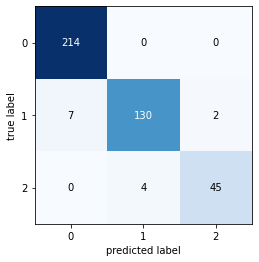

In [40]:
from mlxtend.plotting import plot_confusion_matrix
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)

plot_confusion_matrix(conf_mat=cm)
plt.show()

In [41]:
def plot_complexity_curve(k_list, knn_model, x_train, x_test, y_train, y_test):
    
    train_scores = []
    test_scores = []
    
    # For each k
    for k in k_list:
        # Initialize, fit, predict
        knn = knn_model(k)
        
        knn.fit(x_train, y_train)
        
        train_scores.append(knn.score(x_train, y_train))
        test_scores.append(knn.score(x_test, y_test))

    # Plot
    fig, ax = plt.subplots(figsize = [12,8])
    
    ax.plot(k_list, train_scores, label='Training Accuracy', color='blue')
    ax.plot(k_list, test_scores, label='Testing Accuracy', color='red')

    ax.set(title='k-NN with Different Values for $k$',
           xlabel='Number of Neighbors',
           ylabel='Accuracy')
    
    ax.legend()

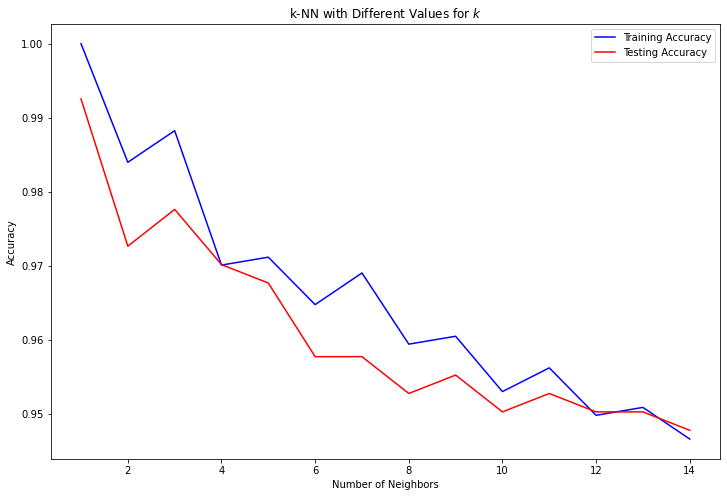

In [42]:
# Create possible values for k
neighbors = np.arange(1, 15)

plot_complexity_curve(neighbors, KNeighborsClassifier, X_train_std, X_test_std, y_train, y_test)

In [44]:
model = KNeighborsClassifier(n_neighbors = 9)

In [45]:
# Treine o modelo, usando os dados de treino. 

model.fit(X_train_std, y_train)

KNeighborsClassifier(n_neighbors=9)

In [46]:
# Use o modelo treinado para fazer previsões usando os dados de teste 

y_pred = model.predict(X_test_std)

In [47]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.94      1.00      0.97       214
           1       0.97      0.90      0.93       139
           2       0.98      0.92      0.95        49

    accuracy                           0.96       402
   macro avg       0.96      0.94      0.95       402
weighted avg       0.96      0.96      0.95       402



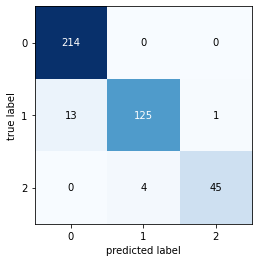

In [48]:
from mlxtend.plotting import plot_confusion_matrix
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)

plot_confusion_matrix(conf_mat=cm)
plt.show()

In [49]:
X = df_with_dummies.drop(['sex', 'smoker', 'charges', 'target', 'flag_sex'], axis=1)
y = df_with_dummies['charges']

In [50]:
X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y, 
                                                    test_size=0.3, 
                                                    random_state=42)

In [51]:
from sklearn.preprocessing import StandardScaler 

In [52]:
scaler = StandardScaler()

In [53]:
X_train_std = scaler.fit_transform(X_train)

In [54]:
X_test_std = scaler.transform(X_test)

In [55]:
from sklearn.neighbors import KNeighborsRegressor
#chama o modelo
model = KNeighborsRegressor()

In [56]:
# Treine o modelo, usando os dados de treino. 

model.fit(X_train_std, y_train)

KNeighborsRegressor()

In [57]:
# Use o modelo treinado para fazer previsões usando os dados de teste 

y_pred = model.predict(X_test_std)

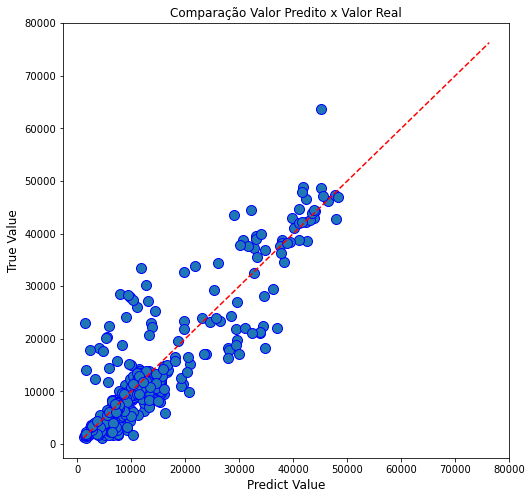

In [58]:
# Vamos criar um gráfico para comparar os Valores Reais com os Preditos
fig = plt.figure(figsize=(8,8))
l = plt.plot(y_pred, y_test, 'bo')
plt.setp(l, markersize=10)
plt.setp(l, markerfacecolor='C0')
plt.title('Comparação Valor Predito x Valor Real', fontsize=12)
plt.ylabel("True Value", fontsize=12)
plt.xlabel("Predict Value", fontsize=12)

# mostra os valores preditos e originais
xl = np.arange(min(y_test), 1.2*max(y_test),(max(y_test)-min(y_test))/10)
yl = xl
plt.plot(xl, yl, 'r--')

plt.show()

In [59]:
from sklearn.metrics import r2_score
R2 = r2_score(y_test, y_pred)
print('R2:', R2)

R2: 0.8008520213801206


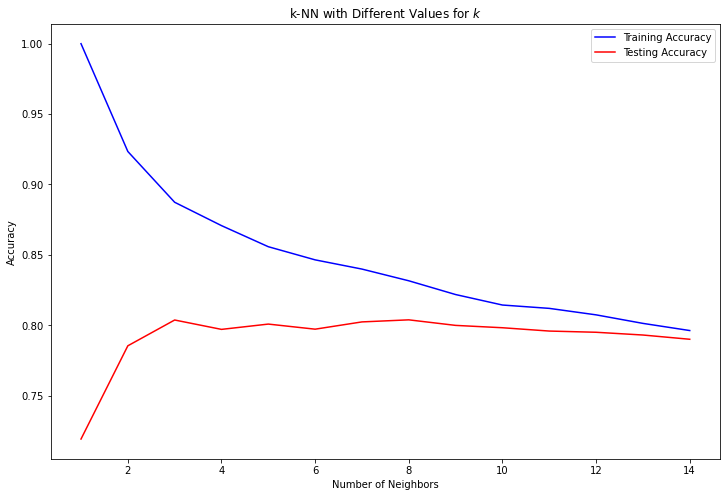

In [60]:
# Create possible values for k
neighbors = np.arange(1, 15)

plot_complexity_curve(neighbors, KNeighborsRegressor, X_train_std, X_test_std, y_train, y_test)